# K-means & Hierarchical clustering 
This case requires developing a customer segmentation to define marketing strategy. 
The  Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("CC GENERAL.csv") #load out dataset
df.head() #viewing the head

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Pre-processing 

In [2]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
df.shape

(8950, 18)

In [4]:
df.isnull().sum() #sum of missing values for each column

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df[['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS',
   'MINIMUM_PAYMENTS']].describe() 

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000
mean,1564.474828,1003.204834,592.437371,411.067645,978.871112,4494.449450,1733.143852,864.206542
std,2081.531879,2136.634782,1659.887917,904.338115,2097.163877,3638.815725,2895.063757,2372.446607
min,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163
25%,128.281915,39.635000,0.000000,0.000000,0.000000,1600.000000,383.276166,169.123707
50%,873.385231,361.280000,38.000000,89.000000,0.000000,3000.000000,856.901546,312.343947
75%,2054.140036,1110.130000,577.405000,468.637500,1113.821139,6500.000000,1901.134317,825.485459
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,30000.000000,50721.483360,76406.207520


In [6]:
df.nunique() #categorical and numerical variables

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [7]:
df['MINIMUM_PAYMENTS'].mode().value_counts()

299.351881    1
dtype: int64

In [8]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())#we replace the NAN by the median 

In [9]:
df.dropna(axis = 0, subset = ['CREDIT_LIMIT'], inplace= True )#Delete the line which is NAN

In [10]:
df.isnull().sum() #sum of missing values for each column

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
df=df.drop(['CUST_ID'],axis = 1 )#Delete the line which is NAN


# hierarchical clustering to identify the inherent groupings with in our data# 

In [12]:
from sklearn.preprocessing import StandardScaler, normalize
df_stan= StandardScaler().fit_transform(df)#data standardization because of the outliers
print(pd.DataFrame(df_stan, columns=df.columns).head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.732054          -0.249881  -0.424934         -0.356957   
1  0.786858           0.134049  -0.469584         -0.356957   
2  0.447041           0.517980  -0.107716          0.108843   
3  0.049015          -1.017743   0.231995          0.546123   
4 -0.358849           0.517980  -0.462095         -0.347317   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349114     -0.466805            -0.806649   
1               -0.454607      2.605438            -1.221928   
2               -0.454607     -0.466805             1.269742   
3               -0.454607     -0.368678            -1.014290   
4               -0.454607     -0.466805            -1.014290   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678716                         -0.707409   
1                   -0.678716                         -0.917090   
2                    2.673295      

In [13]:
df_normal = normalize(df_stan)#scaling of the dataset
df_normal= pd.DataFrame(df_normal, columns= df.columns)

# Dimension Reduce

In [30]:
from sklearn.decomposition import PCA #we will decompose our dataset 
pca = PCA(n_components = 14)
dat = pca.fit_transform(df_normal)
data = pd.DataFrame(dat)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.490473,-0.679278,-0.098108,0.117066,-0.003741,-0.049446,-0.108767,0.083865,0.059042,0.011294,0.059954,-0.003374,0.025414,0.000879
1,-0.518637,0.545193,0.196826,-0.203415,-0.266486,0.193501,0.030015,0.085661,-0.033043,0.458937,0.234830,-0.062003,0.096184,0.015367
2,0.330869,0.269011,0.117621,0.746021,0.131183,-0.098291,0.052512,-0.364434,-0.233511,0.069143,0.061035,0.117054,-0.108589,-0.131676
3,-0.479431,-0.105419,0.457516,0.288960,-0.386830,-0.253591,-0.043059,-0.061197,0.103458,-0.244306,-0.114900,-0.227829,0.173767,-0.116137
4,-0.563901,-0.480989,-0.256663,0.324236,0.027686,0.085564,0.045581,0.135235,0.023464,0.057024,0.052816,0.001013,-0.037476,0.025342


In [17]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
hierar_clusters=model.fit_predict(data)  
"""Applying agglomerative algorithm with 6 clusters, using euclidean distance as a metric and linkage ward minimizes 
the variance of the clusters being merged."""

'Applying agglomerative algorithm with 6 clusters, using euclidean distance as a metric and linkage ward minimizes \nthe variance of the clusters being merged.'

In [26]:
#print(hierar_clusters)
hie_clusters = pd.DataFrame(hierar_clusters)
hie_clusters

,0
0,0
1,3
2,2
3,1
4,0
...,...
8944,5
8945,5
8946,5
8947,5


# plot clusters

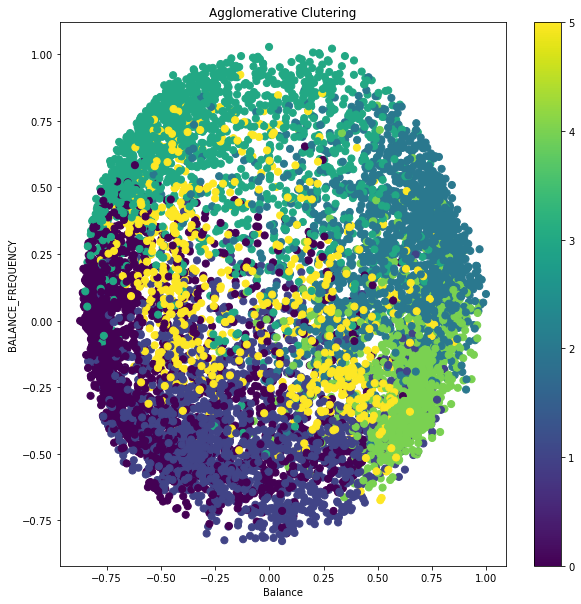

In [20]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (data [0] , data [1] , c= hie_clusters[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Balance")
ax.set_ylabel("BALANCE_FREQUENCY")
plt.colorbar(scatter)


# Plot the dendrogram

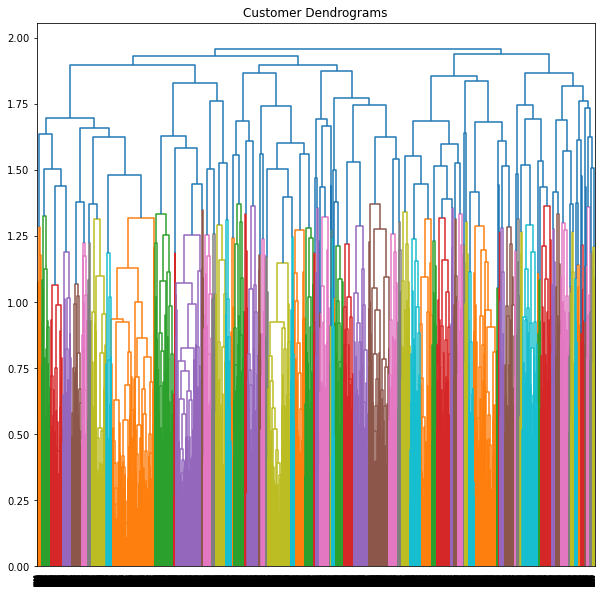

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,10))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

# k-means

In [22]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmodel=KMeans(n_clusters=6, random_state=0)  #Cluster our data by choosing 6 as number of clusters
kmodele=kmodel.fit(data)
kmeans=pd.DataFrame(kmodel.labels_)
kmeans
#i use a default clusters 

,0
0,1
1,4
2,3
3,0
4,1
...,...
8944,5
8945,5
8946,5
8947,5


# different k values and select the best one

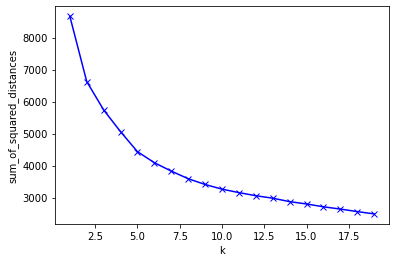

In [23]:
sum_of_squared_distances= []
k_val = range(1,20)
for k in k_val:
    km=KMeans(n_clusters=k)  
    km=km.fit(data)
    sum_of_squared_distances.append(km.inertia_)
#print(sum_of_squared_distances)
plt.plot(k_val, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.show()

In [24]:
# i use 5 as number of clusters
k_model=KMeans(n_clusters=5)  #Cluster our data by choosing 6 as number of clusters
k_modele=k_model.fit(data)
k_means=pd.DataFrame(k_model.labels_)
k_means

,0
0,2
1,3
2,1
3,0
4,2
...,...
8944,4
8945,4
8946,4
8947,0


# plot clusters

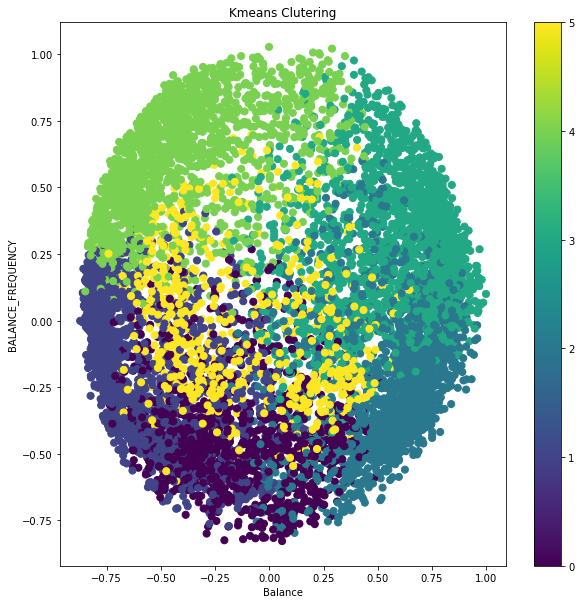

In [27]:

fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (data [0] , data [1] , c=kmeans [0], s=50)
ax.set_title("Kmeans Clutering")
ax.set_xlabel("Balance")
ax.set_ylabel("BALANCE_FREQUENCY")
plt.colorbar(scatter)


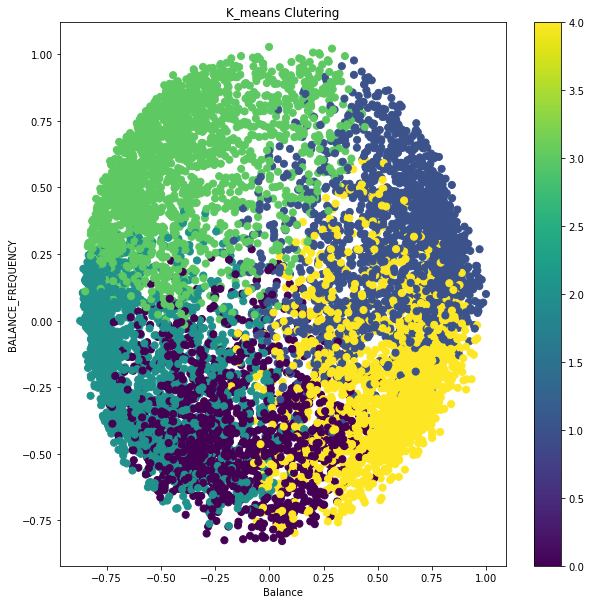

In [28]:
fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (data [0] , data [1] , c=k_means [0], s=50)
ax.set_title("K_means Clutering")
ax.set_xlabel("Balance")
ax.set_ylabel("BALANCE_FREQUENCY")
plt.colorbar(scatter)


# Compare the two results


In [29]:
print(kmodel.inertia_)
print(k_model.inertia_)

4090.1807297192713
4435.064850306666


the use of the kink method gives us an optimal k, here according to the decreasing function of the error, I chose k=5 .the k_means clustering algorithm gives a much lower error rate than with a k=5 through inertia
